# Dubai Neighborhood Venue Category Analysis 

## A. Problem Statement

Dubai is a multi-national, multi-generation, multi-cultural and naturally, multi-demographic city. The purpose of this study is to try to cluster and categorize each area to understand the demographic and characteristics of each area's residents and visitors. 

Analysis of the demographics in Dubai will help understand marketing oppurtunities

## B. Data Description

The datasets used are:<br>
-Foursquare API Venue Data for Dubai.<br>
-Wikipedia Dubai communities list<br>

The Foursquare API Venue dataset will be used find venues and Dubai and their location and categories. Then the venue data will be grouped for each area in Dubai with count of each venue category in each area. This dataset will be used to cluster each area based on the characterstics of venue types in each area.

The Wikipedia Dubai communities list will be used to enrich the above dataset with further useful information.

## C. Methodology

### 1. Dataset Import & Preparation

The two datasets mentioned above will be import using web scrapping and the Foursquare API and will be preprocessed to be easier to analyse.

#### a. Wikipedia Communities Dataset

Below is the raw data webscrapped from Wikipedia

In [6]:
wiki_df.head()

,Community Number,Community (English),Community (Arabic),Area(km2),Population(2000),Population density(/km2),Unnamed: 6
0,126.0,Abu Hail,أبو هيل,1.27 km²,21414,"16,861.4/km²",NaN
1,711.0,Al Awir First,العوير الأولى,NaN,NaN,NaN,NaN
2,721.0,Al Awir Second,العوير الثانية,NaN,NaN,NaN,NaN
3,283.0,Aleyas,العياص,162.4 km2,1706,162.4/km2,NaN
4,333.0,Al Bada'a,البدع,0.82 km²,18816,22946/km²,NaN


Various preprocessing steps were done on the dataset including dropping unneeded columns, transforming the area column to a numbers and dropping the population columns as they are 20 years old and largely inaccurate.

In [20]:
wiki_df.head()

,Community Number,Community Name,Area(km2)
0,126,Abu Hail,1.27
1,711,Al Awir First,NaN
2,721,Al Awir Second,NaN
3,283,Aleyas,162.40
4,333,Al Bada'a,0.82


#### b. FoursquareAPI Dataset

Below is the data accuired from the foursquare venues API using the below parameters

In [23]:
#Latitude & Longtitude of Dubai
lat, long = 25.276987, 55.296249

#Radius of Venues to search for from the Latitude & Longtitude
radius = 100000

In [26]:
venues_df = results['response']['groups'][0]['items']
venues_df = json_normalize(venues_df)
venues_df.head(3)

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.cc,venue.location.neighborhood,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.crossStreet,venue.location.postalCode,venue.venuePage.id
0,e-0-508e4b2ae4b01ceeb4ae3d37-0,0,"[{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]",508e4b2ae4b01ceeb4ae3d37,Arabian Tea House Cafe (كافية بيت الشاي العربي),Al Fahidi St,25.263399,55.299695,"[{'label': 'display', 'lat': 25.26339894786175, 'lng': 55.29969492240867}]",1551,AE,Al Souk Al Kabir,دبي,دبي,الإمارات العربية المتحدة,"[Al Fahidi St, دبي, الإمارات العربية المتحدة]","[{'id': '4bf58dd8d48988d1dc931735', 'name': 'Tea Room', 'pluralName': 'Tea Rooms', 'shortName': 'Tea Room', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/tearoom_', 'suffix': '.png'}, 'primary': True}]",0,[],NaN,NaN,NaN
1,e-0-4b7d809af964a520c2c22fe3-1,0,"[{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]",4b7d809af964a520c2c22fe3,Special Ostadi Kabab (مطعم الأستاد للكباب الخاص),At Mankhool Rd,25.259961,55.298940,"[{'label': 'display', 'lat': 25.259961, 'lng': 55.29894}]",1914,AE,Al Hamriya,دبي,دبي,الإمارات العربية المتحدة,"[At Mankhool Rd (Al Monirah St), دبي, الإمارات العربية المتحدة]","[{'id': '52e81612bcbc57f1066b79f7', 'name': 'Persian Restaurant', 'pluralName': 'Persian Restaurants', 'shortName': 'Persian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/middleeastern_', 'suffix': '.png'}, 'primary': True}]",0,[],Al Monirah St,NaN,NaN
2,e-0-5866b18245c3ed1e7db9931d-2,0,"[{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]",5866b18245c3ed1e7db9931d,Nikki Beach Club,Pearl Jumeirah,25.248306,55.256939,"[{'label': 'display', 'lat': 25.248305850634996, 'lng': 55.25693893432617}]",5084,AE,NaN,دبي,دبي,الإمارات العربية المتحدة,"[Pearl Jumeirah, دبي, الإمارات العربية المتحدة]","[{'id': '52e81612bcbc57f1066b7a0d', 'name': 'Beach Bar', 'pluralName': 'Beach Bars', 'shortName': 'Beach Bar', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/default_', 'suffix': '.png'}, 'primary': True}]",0,[],NaN,NaN,NaN


Various preprocessing steps were done on the dataset including dropping unneeded columns, translating column values in Arabic to English, standardizing the categories column.

In [48]:
venues_df.head(2)

,venue_id,venue_name,categories,city,state,neighborhood,address,venue.location.lat,venue.location.lng,country
0,508e4b2ae4b01ceeb4ae3d37,Arabian Tea House Cafe,Tea Room,Dubai,Dubai,Al Souk Al Kabir,Al Fahidi St,25.263399,55.299695,AE
1,4b7d809af964a520c2c22fe3,Special Ostadi Kabab,Persian Restaurant,Dubai,Dubai,Al Hamriya,At Mankhool Rd,25.259961,55.298940,AE


#### c. Merging both datasets

As there is no common key between the two datasets, Merging was not feasible. The communities dataset will not be used for modeling.

### 2. Data Exploration

The two datasets will be explored to find any information that might help with modelling, as well as better understand the data.

#### a. Explore Venues Dataset

There are many issues with the venues dataset from Foursquare for Dubai, mainly: <br>
1. The number of observations is extremely small with only 99 observations
2. The occurance of each neighbohood/community in the dataset is also small, with most appearing only once. This means that most neighborhoods/communitys will only have one venue category which will not provide proper modelling.

In [8]:
df['city'].value_counts()

Dubai    99
Name: city, dtype: int64

In [7]:
df['neighborhood'].value_counts()

Downtown Dubai              5
Jumeirah 2                  3
Al Wasl                     2
Al Souk Al Kabir            1
Zabeel 2                    1
وسط مدينة دبي               1
Jumeirah 1                  1
Ras Al Khor                 1
Dubai Design District       1
Al Hamriya                  1
World Trade Centre (WTC)    1
Name: neighborhood, dtype: int64

Another issue is that some categories are too specific, with instances like `'Brazilian Restaurant', 'French Restaurant', 'Japanese Restaurant'` instead of a more comprahensive `'Restraunt'`

It is possible to use feature engineering to get more suitable categories. However, this will be wasted as the number of observations is already very small.

In [6]:
df['categories'].unique()

array(['Tea Room', 'Persian Restaurant', 'Beach Bar', 'Gym',
       'Coffee Shop', 'Plaza', 'Golf Course', 'Resort', 'Hotel',
       'Steakhouse', 'Beach', 'Burger Joint', 'Brazilian Restaurant',
       'French Restaurant', 'Japanese Restaurant', 'Café', 'Restaurant',
       'Monument / Landmark', 'Shopping Plaza', 'Movie Theater',
       'Boutique', 'Cocktail Bar', 'Shopping Mall', 'Bookstore',
       'Jewelry Store', 'Italian Restaurant', 'Shoe Store', 'Opera House',
       'Greek Restaurant', 'Fountain', 'Multiplex', 'Diner',
       'Indian Restaurant', 'Department Store', 'Airport Service',
       'American Restaurant', 'Lounge', 'Seafood Restaurant',
       'Mediterranean Restaurant', 'Chinese Restaurant', 'Hookah Bar',
       'Bakery', 'Peruvian Restaurant', 'Gym / Fitness Center',
       'Leather Goods Store', 'Cupcake Shop', 'Canal',
       'Electronics Store', 'Asian Restaurant',
       'Residential Building (Apartment / Condo)'], dtype=object)

#### a. Explore Communities Dataset

As mentioned previously, it was not possbile to merge the two datasets and only the venues dataset will be used for modelling. However, The insight gained from exploring the Communities dataset was useful.

We can observe from the below boxplot that most communities have an area between slightly above 0 to around 40 km2. We also absrove that some communities are extremely large at around 80 or 160 km2.

<AxesSubplot:ylabel='Area(km2)'>

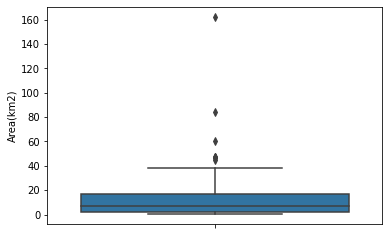

In [24]:
sns.boxplot(data=df, y='Area(km2)')

### 3. Modelling & Validation

The venues dataset will be used for clustering to classify each neighborhood/community to a demographic cluster based on the venue categories. However, as mentioned previously, the data is insufficent to provide proper modelling.

#### a. One Hot Encoding

The venues dataset will be one-hot encoding where each venue category will be a feature to use for clustering.

In [8]:
df.head()

,Airport Service,American Restaurant,Asian Restaurant,Bakery,Beach,Beach Bar,Bookstore,Boutique,Brazilian Restaurant,Burger Joint,...,Plaza,Residential Building (Apartment / Condo),Resort,Restaurant,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Steakhouse,Tea Room
address,,,,,,,,,,,,,,,,,,,,,
1 Mohammed bin Rashid Blvd,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1 Sheikh Mohammed Bin Rashid Boulevard,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
168 Jumeira Rd,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3 Sheikh Zayed Road,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Al Boursa Street DIFC,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


As can be seen the below table; most neighbohood/community have only one venue category due to the sparsity of the data. We do not expect accurate modelling from this data.

In [9]:
df.sum(axis=1).sort_values()

address
1 Mohammed bin Rashid Blvd         1
Mercato Mall                       1
Marasi Drive                       1
La Mer                             1
Jumeirah Bay Island                1
                                  ..
Pearl Jumeirah                     2
Sheikh Mohammed Bin Rashid Blvd    2
Al Wasl                            3
Jumeirah Beach Rd                  4
The Dubai Mall                     9
Length: 77, dtype: int64

#### b. Clustering

KMeans clustering was used with 3 clusters. This is because it is the simplist algorithm to implament and thus, the most explainable; which is the most suitable for sparse data.

### 4. Results

As can be seen below, each cluster does not have any unique properties due to the sparsity of the data.

In [30]:
X_test.head(2)

,Airport Service,American Restaurant,Asian Restaurant,Bakery,Beach,Beach Bar,Bookstore,Boutique,Brazilian Restaurant,Burger Joint,...,Residential Building (Apartment / Condo),Resort,Restaurant,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Steakhouse,Tea Room,predicted_clusters
address,,,,,,,,,,,,,,,,,,,,,
"Gate Village 06, DIFC",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3 Sheikh Zayed Road,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


### 5. Discussion

The sparsity of the data from the Foursquare API for venues in Dubai was an extremely large hurdle for producing satisfying modelling. It was attempted to use other datasets. However, no suitable dataset was found.

If a suitable dataset was to be found, the above methodology can be used to provide more satisfactory results.

### 5. Conclusion

No suitable results were found due to the lack of data. However, in the case that suitable data is found the above methodolgy might provide better results.
